In [1]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:

cty_boundary = gpd.read_file(r'data\GeoJson\2021_EDM_census_boundary.geojson')

In [9]:
cty_boundary

,dguid,boundary_type,cdname,ccsname,cmatype,ccsuid,_predicate,cmaname,landarea,cduid,dauid,cmapuid,cdtype,pruid,dguidp,cmauid,geometry
0,2021A00034811,Census Division,Division No. 11,None,None,None,None,None,15746.415,4811,None,None,CDR,48,None,None,"MULTIPOLYGON (((-113.69397 53.99268, -113.6697..."
1,2021S051248112107,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,14.237,None,48112107,None,None,48,None,None,"MULTIPOLYGON (((-113.39391 53.52664, -113.3938..."
2,2021S051248112108,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.1628,None,48112108,None,None,48,None,None,"MULTIPOLYGON (((-113.41847 53.53588, -113.4184..."
3,2021S051248112109,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.2837,None,48112109,None,None,48,None,None,"MULTIPOLYGON (((-113.43150 53.53760, -113.4303..."
4,2021S051248112110,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.3243,None,48112110,None,None,48,None,None,"MULTIPOLYGON (((-113.41841 53.54107, -113.4183..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2021S051248112848,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.2872,None,48112848,None,None,48,None,None,"MULTIPOLYGON (((-113.50111 53.53722, -113.5010..."
1388,2021S051248112849,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.0408,None,48112849,None,None,48,None,None,"MULTIPOLYGON (((-113.50856 53.53722, -113.5085..."
1389,2021S051248112853,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,74.0198,None,48112853,None,None,48,None,None,"MULTIPOLYGON (((-113.30033 53.85051, -113.3001..."
1390,2021S05024811061,Census Subdivision,None,Edmonton,None,4811061,None,None,765.6076,None,None,None,None,48,None,None,"MULTIPOLYGON (((-113.29507 53.69082, -113.2950..."


<Axes: >

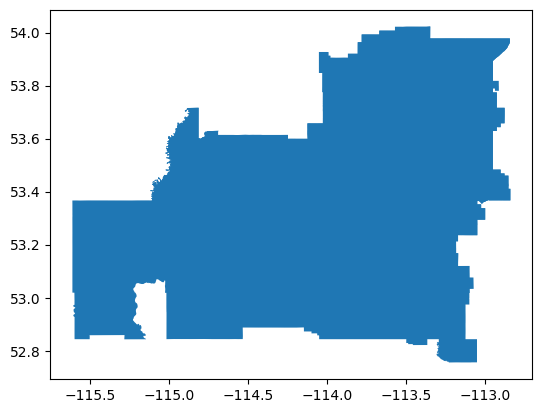

In [10]:
cty_boundary.plot()

In [13]:
#ward_boundary = gpd.read_file(r'data\GeoJson\CityofEdmontonWardBoundaryandCouncil.geojson')
nbhd = gpd.read_file(r'data\GeoJson\EdmontonNeighbourhoods_20231110.geojson')

<Axes: >

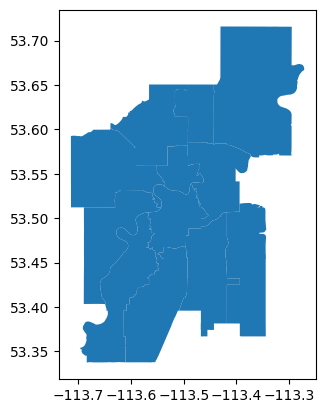

In [12]:
ward_boundary.plot()

<Axes: >

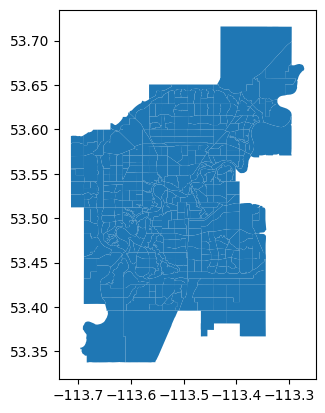

In [14]:
nbhd.plot()

In [24]:
nbhd.head(15)

,neighbourhood_number,name,effective_end_date,descriptive_name,description,civic_ward_name,effective_start_date,district,geometry
0,2010,ABBOTTSFIELD,None,Abbottsfield,"Abbottsfield was once owned by E.F. Carey, one...",Métis,1981-10-01,118 Avenue,"MULTIPOLYGON (((-113.38763 53.57613, -113.3888..."
1,3460,ALBANY,None,Albany,None,Anirniq,2011-06-13,Northwest,"MULTIPOLYGON (((-113.56025 53.63160, -113.5622..."
2,1010,ALBERTA AVENUE,None,Alberta Avenue,One of the city's older residential neighbourh...,Métis,1981-10-01,118 Avenue,"MULTIPOLYGON (((-113.49226 53.57662, -113.4922..."
3,4010,ALBERTA PARK INDUSTRIAL,None,Alberta Park Industrial,This non-residential neighbourhood is largely ...,Nakota Isga,1981-10-01,Jasper Place,"MULTIPOLYGON (((-113.59041 53.56654, -113.5904..."
4,6669,ALCES,None,Alces,Formerly Decoteau North,Sspomitapi,2019-07-25,Ellerslie,"MULTIPOLYGON (((-113.37649 53.42488, -113.3690..."
5,4020,ALDERGROVE,None,Aldergrove,"Planned in the 1970s, this area's multi-family...",Nakota Isga,1981-10-01,West Edmonton,"MULTIPOLYGON (((-113.65209 53.51950, -113.6520..."
6,5458,ALLARD,None,Allard,None,Ipiihkoohkanipiaohtsi,2011-07-18,Southwest,"MULTIPOLYGON (((-113.51693 53.40651, -113.5176..."
7,5010,ALLENDALE,None,Allendale,"Once farmed by the Allen family, this area was...",papastew,1981-10-01,Scona,"MULTIPOLYGON (((-113.50260 53.50637, -113.5027..."
8,5505,AMBLESIDE,None,Ambleside,The name Ambleside most likely originates from...,pihêsiwin,2007-07-19,Southwest,"MULTIPOLYGON (((-113.56982 53.42491, -113.5698..."
9,4011,ANTHONY HENDAY,None,Anthony Henday,This non-residential neighbourhood forms part ...,Nakota Isga,1981-10-01,West Henday,"MULTIPOLYGON (((-113.66520 53.52545, -113.6656..."


In [15]:
gdf = gpd.read_file(r'data\GeoJson\geos.geojson')

<Axes: >

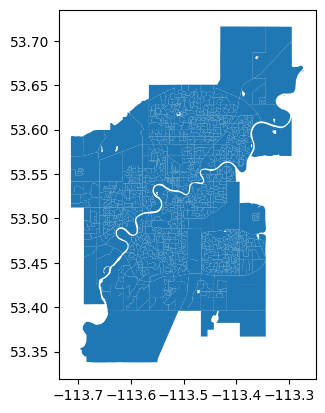

In [16]:
gdf.plot()

In [17]:
gdf.columns.to_list()

['a',
 'q',
 't',
 'dw',
 'hh',
 'id',
 'pop',
 'name',
 'rgid',
 'rpid',
 'ruid',
 'rguid',
 'geometry']

<Axes: >

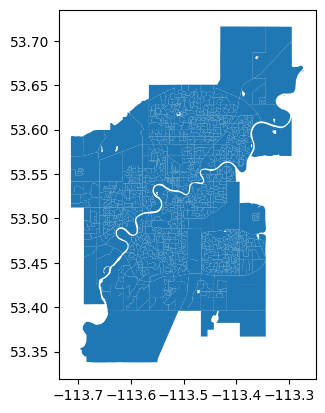

In [19]:
gdf.plot()

In [20]:
gdf.head()

,a,q,t,dw,hh,id,pop,name,rgid,rpid,ruid,rguid,geometry
0,0.2533,0,DA,348,313,48110083,638,48110083,4811,4811061,8350042.01,48835,"MULTIPOLYGON (((-113.38722 53.57092, -113.3869..."
1,0.0063,0,DA,5,5,48110084,17,48110084,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39366 53.57588, -113.3937..."
2,0.183,0,DA,252,220,48110085,525,48110085,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39359 53.57044, -113.3936..."
3,0.163,0,DA,163,152,48110086,385,48110086,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39359 53.57044, -113.3938..."
4,0.0924,0,DA,109,101,48110087,238,48110087,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39472 53.57591, -113.3947..."


In [21]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   a         1352 non-null   object  
 1   q         1352 non-null   object  
 2   t         1352 non-null   object  
 3   dw        1352 non-null   object  
 4   hh        1352 non-null   object  
 5   id        1352 non-null   object  
 6   pop       1352 non-null   object  
 7   name      1352 non-null   object  
 8   rgid      1352 non-null   object  
 9   rpid      1352 non-null   object  
 10  ruid      1352 non-null   object  
 11  rguid     1352 non-null   object  
 12  geometry  1352 non-null   geometry
dtypes: geometry(1), object(12)
memory usage: 137.4+ KB


In [22]:
gdf['q'].unique()

array(['0'], dtype=object)

In [23]:
gdf['name'].head()

0    48110083
1    48110084
2    48110085
3    48110086
4    48110087
Name: name, dtype: object

In [31]:
map = gpd.read_file(r'data\GeoJson\map (1).geojson')

In [32]:
map.head()

,dguid,boundary_type,cdname,ccsname,cmatype,ccsuid,_predicate,cmaname,landarea,cduid,dauid,cmapuid,cdtype,pruid,dguidp,cmauid,geometry
0,None,None,None,None,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,None,"POLYGON ((-113.36419 53.43965, -113.36429 53.4..."
1,2021S051248112107,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,14.2370,None,48112107.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.39391 53.52664, -113.3938..."
2,2021S051248112108,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.1628,None,48112108.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.41847 53.53588, -113.4184..."
3,2021S051248112109,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.2837,None,48112109.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.43150 53.53760, -113.4303..."
4,2021S051248112110,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.3243,None,48112110.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.41841 53.54107, -113.4183..."


<Axes: >

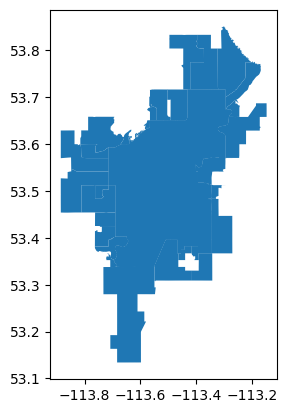

In [33]:
map.plot()

In [2]:
merge = gpd.read_file(r'C:\Users\toast\Downloads\Merged_Neighbourhood_Data.geojson')

<Axes: >

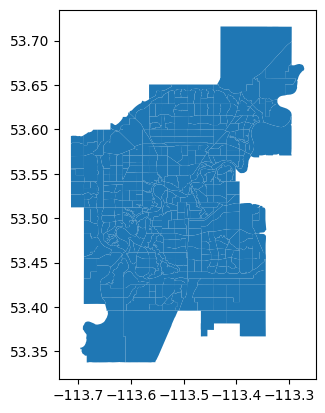

In [3]:
merge.plot()

In [4]:
merge.head()

,neighbourhood_number_x,name,effective_end_date,descriptive_name,description,civic_ward_name,effective_start_date,district,neighbourhood_name,neighbourhood_number_y,...,Income_Inequality_Family_Dynamics,Work_Life_Balance_Income_Equality,PC7_Mixed_Factors,PC8_Mixed_Factors,PC9_Mixed_Factors,PC10_Mixed_Factors,PC11_Mixed_Factors,PC12_Mixed_Factors,PCA_Sum,geometry
0,2010,ABBOTTSFIELD,None,Abbottsfield,"Abbottsfield was once owned by E.F. Carey, one...",Métis,1981-10-01,118 Avenue,ABBOTTSFIELD,2010.0,...,-3.368228,-0.533239,-0.043504,1.048666,-0.911090,-1.217446,1.336650,1.555954,-16.216034,"MULTIPOLYGON (((-113.38763 53.57613, -113.3888..."
1,3460,ALBANY,None,Albany,None,Anirniq,2011-06-13,Northwest,ALBANY,3460.0,...,-1.443614,0.553169,0.769335,0.301044,-0.009346,0.668393,0.232428,-0.323352,-14.055561,"MULTIPOLYGON (((-113.56025 53.63160, -113.5622..."
2,1010,ALBERTA AVENUE,None,Alberta Avenue,One of the city's older residential neighbourh...,Métis,1981-10-01,118 Avenue,ALBERTA AVENUE,1010.0,...,0.964988,-2.087472,-1.466836,-0.565888,1.537319,0.236816,-0.994883,-0.027380,5.432444,"MULTIPOLYGON (((-113.49226 53.57662, -113.4922..."
3,4010,ALBERTA PARK INDUSTRIAL,None,Alberta Park Industrial,This non-residential neighbourhood is largely ...,Nakota Isga,1981-10-01,Jasper Place,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.59041 53.56654, -113.5904..."
4,6669,ALCES,None,Alces,Formerly Decoteau North,Sspomitapi,2019-07-25,Ellerslie,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.37649 53.42488, -113.3690..."


In [47]:
cimd = pd.read_csv(r'data\GeoJson\tab\CIMD_GEOM.csv')

In [49]:
gpd.GeoDataFrame(cimd)
#cimd.head()

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,...,DArplamx,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,...,4.822695e+06,2.168269e+06,3776,MULTIPOLYGON (((-113.388777518234 53.570538794...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,...,4.822494e+06,2.169113e+06,2197,MULTIPOLYGON (((-113.38734679662497 53.5708821...,Edmonton,0.1830,48,48110085.0,INTERSECTS,Census Dissemination Area
2,2021S051248110086,48110086,Alberta,370,3,-0.230,3,-0.100,4,0.101,...,4.822151e+06,2.169139e+06,2197,MULTIPOLYGON (((-113.39364159883434 53.5713495...,Edmonton,0.1630,48,48110086.0,INTERSECTS,Census Dissemination Area
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,...,4.822209e+06,2.169474e+06,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,...,4.821868e+06,2.169431e+06,2197,MULTIPOLYGON (((-113.39837051581337 53.5751028...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2021S051248111975,48111975,Alberta,1002,1,-0.686,5,1.550,1,-1.039,...,4.803912e+06,2.167004e+06,4308,MULTIPOLYGON (((-113.64011889110941 53.4967559...,Edmonton,0.2768,48,48111975.0,INTERSECTS,Census Dissemination Area
947,2021S051248111976,48111976,Alberta,718,1,-0.727,4,0.481,1,-0.924,...,4.804083e+06,2.166905e+06,4308,MULTIPOLYGON (((-113.63975161199023 53.5022488...,Edmonton,0.2330,48,48111976.0,INTERSECTS,Census Dissemination Area
948,2021S051248111977,48111977,Alberta,890,5,0.557,5,1.141,4,0.120,...,4.804297e+06,2.166829e+06,4308,MULTIPOLYGON (((-113.64006369847458 53.4970808...,Edmonton,0.1357,48,48111977.0,INTERSECTS,Census Dissemination Area
949,2021S051248111978,48111978,Alberta,1272,5,0.409,4,0.711,2,-0.456,...,4.804642e+06,2.166764e+06,4308,MULTIPOLYGON (((-113.63450101334706 53.4968619...,Edmonton,0.2875,48,48111978.0,INTERSECTS,Census Dissemination Area


In [51]:
 
cimd_geo = gpd.GeoDataFrame(cimd)

In [66]:
cimd_geo.set_geometry(col='the_geom')

TypeError: Input must be valid geometry objects: MULTIPOLYGON (((-113.388777518234 53.57053879435542, -113.38777731996223 53.57074760482541, -113.38734679662497 53.570882104201885, -113.38722861147528 53.570929407533804, -113.38696549828025 53.570548003299834, -113.38668569373051 53.57014000213157, -113.38650458360519 53.56987390290683, -113.38639290351409 53.56976829725147, -113.38584967708294 53.56950939775859, -113.38509929732567 53.56932649031843, -113.38305988014805 53.56905249398219, -113.38243119913206 53.56888520604989, -113.38176429358941 53.56857490338165, -113.38154049059108 53.568415899293726, -113.3814812074595 53.568373709686334, -113.38112450484822 53.56794030942837, -113.38096748865897 53.56756579169636, -113.3809854920257 53.56707990566763, -113.38114889830086 53.566762005896585, -113.38150437763515 53.566368292273395, -113.38257031453509 53.56571769104271, -113.38343761057837 53.56502610691328, -113.38377639980814 53.56487551174439, -113.38506919663622 53.56449909394102, -113.38530450224789 53.56465620296185, -113.38559381866705 53.564965092968656, -113.38574579514709 53.565519510033006, -113.38599178822507 53.56586519293468, -113.38622720559422 53.56602239019985, -113.3867346746427 53.56618309302679, -113.38706911417002 53.566221391773176, -113.38718151158805 53.56687529721584, -113.38754130484956 53.56763249415473, -113.38754549540808 53.56851350791493, -113.38770398109784 53.56864520480573, -113.38830050744326 53.56877719676617, -113.3890595170499 53.56884290049111, -113.39058479714213 53.56883940697151, -113.39144271215041 53.568837201999116, -113.39368060481301 53.56883138558963, -113.39366528393724 53.56936220794143, -113.3936397838177 53.569713295793335, -113.3936124911738 53.57029830555454, -113.3936054907202 53.57044231533806, -113.39150627602682 53.5704482958863, -113.38954390360105 53.57046959235027, -113.388777518234 53.57053879435542)))

In [7]:
join = gpd.sjoin(left_df=merge, right_df=cimd, how='left')


C:\Users\toast\AppData\Local\Temp\ipykernel_13588\2866300606.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  join = gpd.sjoin(left_df=merge, right_df=cimd, how='left')


In [18]:
#cimd.set_crs(crs=4326)
cimd.set_crs(epsg=3347, inplace=True)

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,...,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type,geometry
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,...,2168269.1943,3776,MULTIPOLYGON (((-113.388777518234 53.570538794...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area,None
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,...,2169113.1171,2197,MULTIPOLYGON (((-113.38734679662497 53.5708821...,Edmonton,0.183,48,48110085.0,INTERSECTS,Census Dissemination Area,None
2,2021S051248110086,48110086,Alberta,370,3,-0.23,3,-0.1,4,0.101,...,2169139.3245,2197,MULTIPOLYGON (((-113.39364159883434 53.5713495...,Edmonton,0.163,48,48110086.0,INTERSECTS,Census Dissemination Area,None
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,...,2169474.4829,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area,None
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,...,2169430.5971,2197,MULTIPOLYGON (((-113.39837051581337 53.5751028...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2021S051248111975,48111975,Alberta,1002,1,-0.686,5,1.55,1,-1.039,...,2167004.239,4308,MULTIPOLYGON (((-113.64011889110941 53.4967559...,Edmonton,0.2768,48,48111975.0,INTERSECTS,Census Dissemination Area,None
947,2021S051248111976,48111976,Alberta,718,1,-0.727,4,0.481,1,-0.924,...,2166905.1128,4308,MULTIPOLYGON (((-113.63975161199023 53.5022488...,Edmonton,0.233,48,48111976.0,INTERSECTS,Census Dissemination Area,None
948,2021S051248111977,48111977,Alberta,890,5,0.557,5,1.141,4,0.12,...,2166828.9371,4308,MULTIPOLYGON (((-113.64006369847458 53.4970808...,Edmonton,0.1357,48,48111977.0,INTERSECTS,Census Dissemination Area,None
949,2021S051248111978,48111978,Alberta,1272,5,0.409,4,0.711,2,-0.456,...,2166764.2517,4308,MULTIPOLYGON (((-113.63450101334706 53.4968619...,Edmonton,0.2875,48,48111978.0,INTERSECTS,Census Dissemination Area,None


In [40]:
#cimd.to_crs(epsg=4326, inplace=True)
join = gpd.sjoin(left_df=cimd, right_df=merge, how='right')

In [41]:
join

,index_left,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,...,Income_Inequality_Family_Dynamics,Work_Life_Balance_Income_Equality,PC7_Mixed_Factors,PC8_Mixed_Factors,PC9_Mixed_Factors,PC10_Mixed_Factors,PC11_Mixed_Factors,PC12_Mixed_Factors,PCA_Sum,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.368228,-0.533239,-0.043504,1.048666,-0.911090,-1.217446,1.336650,1.555954,-16.216034,"MULTIPOLYGON (((-113.38763 53.57613, -113.3888..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.443614,0.553169,0.769335,0.301044,-0.009346,0.668393,0.232428,-0.323352,-14.055561,"MULTIPOLYGON (((-113.56025 53.63160, -113.5622..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.964988,-2.087472,-1.466836,-0.565888,1.537319,0.236816,-0.994883,-0.027380,5.432444,"MULTIPOLYGON (((-113.49226 53.57662, -113.4922..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.59041 53.56654, -113.5904..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.37649 53.42488, -113.3690..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.630907,-0.674315,-0.918617,1.945051,-0.627027,-0.679662,-0.143203,0.253624,-9.813442,"MULTIPOLYGON (((-113.56570 53.56909, -113.5657..."
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.44511 53.58364, -113.4451..."
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.49196 53.58477, -113.4937..."
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.745408,-1.153654,0.305707,-0.026448,0.467743,0.502160,0.362283,0.025903,-5.122239,"MULTIPOLYGON (((-113.42930 53.60690, -113.4300..."


In [31]:
join.columns.to_list()

['neighbourhood_number_x',
 'name',
 'effective_end_date',
 'descriptive_name',
 'description',
 'civic_ward_name',
 'effective_start_date',
 'district',
 'neighbourhood_name',
 'neighbourhood_number_y',
 'Education_Training_Profile',
 'Demographic_Housing_Profile',
 'Employment_Work_Pattern_Profile',
 'Family_Dwelling_Characteristics',
 'Income_Inequality_Family_Dynamics',
 'Work_Life_Balance_Income_Equality',
 'PC7_Mixed_Factors',
 'PC8_Mixed_Factors',
 'PC9_Mixed_Factors',
 'PC10_Mixed_Factors',
 'PC11_Mixed_Factors',
 'PC12_Mixed_Factors',
 'PCA_Sum',
 'geometry',
 'index_right',
 'DAdguid',
 'PRCDDA',
 'Province',
 'Dissemination area (DA) Population',
 'Situational vulnerability Quintiles',
 'Situational vulnerability Scores',
 'Ethno-cultural composition Quintiles',
 'Ethno-cultural composition Scores',
 'Residential instability Quintiles',
 'Residential instability Scores',
 'Economic dependency Quintiles',
 'Economic dependency Scores',
 'DArplat',
 'DArplong',
 'DApop_2021',


In [32]:
join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 403 entries, 0 to 402
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   neighbourhood_number_x                403 non-null    object        
 1   name                                  403 non-null    object        
 2   effective_end_date                    0 non-null      object        
 3   descriptive_name                      403 non-null    object        
 4   description                           337 non-null    object        
 5   civic_ward_name                       403 non-null    object        
 6   effective_start_date                  403 non-null    datetime64[ns]
 7   district                              403 non-null    object        
 8   neighbourhood_name                    277 non-null    object        
 9   neighbourhood_number_y                277 non-null    float64       
 10 

In [43]:
merge.to_json('data\GeoJson\merge.geojson')

ValueError: Unknown na method data\GeoJson\merge.geojson

In [44]:
DA = gpd.read_file(r'data\GeoJson\DA_GEO.geojson')

In [45]:
DA

,fid,da_int,name,geometry
0,1.0,48111966.0,Anthony Henday Big Lake,"MULTIPOLYGON (((-113.63917 53.59971, -113.6391..."
1,2.0,48111958.0,Anthony Henday Rampart,"MULTIPOLYGON (((-113.60149 53.62064, -113.6024..."
2,3.0,48111970.0,Winterburn Industrial Area West,"MULTIPOLYGON (((-113.68891 53.52052, -113.6889..."
3,4.0,48111972.0,Potter Greens,"MULTIPOLYGON (((-113.68040 53.51756, -113.6802..."
4,5.0,48111974.0,Anthony Henday South West,"MULTIPOLYGON (((-113.64843 53.50255, -113.6484..."
...,...,...,...,...
1214,1214.0,48112288.0,Downtown,"MULTIPOLYGON (((-113.49372 53.54416, -113.4937..."
1215,1215.0,48112289.0,Downtown,"MULTIPOLYGON (((-113.49743 53.54093, -113.4974..."
1216,1216.0,48112290.0,Downtown,"MULTIPOLYGON (((-113.49560 53.53742, -113.4956..."
1217,1217.0,48112291.0,Downtown,"MULTIPOLYGON (((-113.49375 53.53741, -113.4939..."


In [57]:
import shapely
from shapely import wkt, geometry

In [63]:
cimd['the_geom'] = cimd['the_geom'].apply(wkt.loads)


In [65]:
cimd['the_geom'].plot()

TypeError: no numeric data to plot

In [67]:
shapely.difference(a=DA['geometry'], b=cimd['the_geom'])

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

In [68]:
cimd.set_geometry(col=cimd['the_geom'])

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,...,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type,geometry
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,...,2.168269e+06,3776,MULTIPOLYGON (((-113.388777518234 53.570538794...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.38878 53.57054, -113.3877..."
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,...,2.169113e+06,2197,MULTIPOLYGON (((-113.38734679662497 53.5708821...,Edmonton,0.1830,48,48110085.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.38735 53.57088, -113.3877..."
2,2021S051248110086,48110086,Alberta,370,3,-0.230,3,-0.100,4,0.101,...,2.169139e+06,2197,MULTIPOLYGON (((-113.39364159883434 53.5713495...,Edmonton,0.1630,48,48110086.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.39364 53.57135, -113.3936..."
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,...,2.169474e+06,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.39534 53.57758, -113.3947..."
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,...,2.169431e+06,2197,MULTIPOLYGON (((-113.39837051581337 53.5751028...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.39837 53.57510, -113.3983..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2021S051248111975,48111975,Alberta,1002,1,-0.686,5,1.550,1,-1.039,...,2.167004e+06,4308,MULTIPOLYGON (((-113.64011889110941 53.4967559...,Edmonton,0.2768,48,48111975.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.64012 53.49676, -113.6402..."
947,2021S051248111976,48111976,Alberta,718,1,-0.727,4,0.481,1,-0.924,...,2.166905e+06,4308,MULTIPOLYGON (((-113.63975161199023 53.5022488...,Edmonton,0.2330,48,48111976.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.63975 53.50225, -113.6397..."
948,2021S051248111977,48111977,Alberta,890,5,0.557,5,1.141,4,0.120,...,2.166829e+06,4308,MULTIPOLYGON (((-113.64006369847458 53.4970808...,Edmonton,0.1357,48,48111977.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.64006 53.49708, -113.6401..."
949,2021S051248111978,48111978,Alberta,1272,5,0.409,4,0.711,2,-0.456,...,2.166764e+06,4308,MULTIPOLYGON (((-113.63450101334706 53.4968619...,Edmonton,0.2875,48,48111978.0,INTERSECTS,Census Dissemination Area,"MULTIPOLYGON (((-113.63450 53.49686, -113.6348..."


In [74]:
shapely.difference(a=DA['geometry'], b=cimd_geo['the_geom'])

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

In [70]:
DA.set_geometry(col=DA['geometry'])

,fid,da_int,name,geometry
0,1.0,48111966.0,Anthony Henday Big Lake,"MULTIPOLYGON (((-113.63917 53.59971, -113.6391..."
1,2.0,48111958.0,Anthony Henday Rampart,"MULTIPOLYGON (((-113.60149 53.62064, -113.6024..."
2,3.0,48111970.0,Winterburn Industrial Area West,"MULTIPOLYGON (((-113.68891 53.52052, -113.6889..."
3,4.0,48111972.0,Potter Greens,"MULTIPOLYGON (((-113.68040 53.51756, -113.6802..."
4,5.0,48111974.0,Anthony Henday South West,"MULTIPOLYGON (((-113.64843 53.50255, -113.6484..."
...,...,...,...,...
1214,1214.0,48112288.0,Downtown,"MULTIPOLYGON (((-113.49372 53.54416, -113.4937..."
1215,1215.0,48112289.0,Downtown,"MULTIPOLYGON (((-113.49743 53.54093, -113.4974..."
1216,1216.0,48112290.0,Downtown,"MULTIPOLYGON (((-113.49560 53.53742, -113.4956..."
1217,1217.0,48112291.0,Downtown,"MULTIPOLYGON (((-113.49375 53.53741, -113.4939..."


In [78]:
import xarray as xr
cimd_geo['the_geom'].to_xarray()
#(cimd['the_geom'].all())

<xarray.DataArray 'the_geom' (index: 951)>
array(['MULTIPOLYGON (((-113.388777518234 53.57053879435542, -113.38777731996223 53.57074760482541, -113.38734679662497 53.570882104201885, -113.38722861147528 53.570929407533804, -113.38696549828025 53.570548003299834, -113.38668569373051 53.57014000213157, -113.38650458360519 53.56987390290683, -113.38639290351409 53.56976829725147, -113.38584967708294 53.56950939775859, -113.38509929732567 53.56932649031843, -113.38305988014805 53.56905249398219, -113.38243119913206 53.56888520604989, -113.38176429358941 53.56857490338165, -113.38154049059108 53.568415899293726, -113.3814812074595 53.568373709686334, -113.38112450484822 53.56794030942837, -113.38096748865897 53.56756579169636, -113.3809854920257 53.56707990566763, -113.38114889830086 53.566762005896585, -113.38150437763515 53.566368292273395, -113.38257031453509 53.56571769104271, -113.38343761057837 53.56502610691328, -113.38377639980814 53.56487551174439, -113.38506919663622 53.56449909394102, -113.38530450224789 53.56465620296185, -113.38559381866705 53.564965092968656, -113.38574579514709 53.565519510033006, -113.38599178822507 53.56586519293468, -113.38622720559422 53.56602239019985, -113.3867346746427 53.56618309302679, -113.38706911417002 53.566221391773176, -113.38718151158805 53.56687529721584, -113.38754130484956 53.56763249415473, -113.38754549540808 53.56851350791493, -113.38770398109784 53.56864520480573, -113.38830050744326 53.56877719676617, -113.3890595170499 53.56884290049111, -113.39058479714213 53.56883940697151, -113.39144271215041 53.568837201999116, -113.39368060481301 53.56883138558963, -113.39366528393724 53.56936220794143, -113.3936397838177 53.569713295793335, -113.3936124911738 53.57029830555454, -113.3936054907202 53.57044231533806, -113.39150627602682 53.5704482958863, -113.38954390360105 53.57046959235027, -113.388777518234 53.57053879435542)))',
       'MULTIPOLYGON (((-113.38734679662497 53.570882104201885, -113.38777731996223 53.57074760482541, -113.388777518234 53.57053879435542, -113.38954390360105 53.57046959235027, -113.39150627602682 53.5704482958863, -113.3936054907202 53.57044231533806, -113.39364159883434 53.57134959169747, -113.39371669644218 53.57160880269584, -113.39371841071194 53.571905497044405, -113.39372131172517 53.5727595999302, -113.39371968575286 53.57353279657818, -113.39371808611403 53.574307923775685, -113.39371649177674 53.57507929298698, -113.39159925142158 53.57507650662428, -113.38992449641648 53.57507429465471, -113.38946732042902 53.57500249997229, -113.38908107164956 53.57484844654519, -113.38908086047223 53.57484832496587, -113.38887718570057 53.57471760225884, -113.38861598750114 53.57437210038641, -113.38857419237779 53.57282658986353, -113.38841758311878 53.57246109276431, -113.38802917948934 53.57200130270891, -113.38774291308458 53.57174630986454, -113.38752698505876 53.571399899349224, -113.38722861147528 53.570929407533804, -113.38734679662497 53.570882104201885)))',
       'MULTIPOLYGON (((-113.39364159883434 53.57134959169747, -113.3936054907202 53.57044231533806, -113.39381668743799 53.57043799892393, -113.39529168278091 53.57034560965789, -113.39684768523612 53.57035030407627, -113.39838821067116 53.57034639116381, -113.39837048363651 53.571902205979335, -113.39837199995254 53.57352949678221, -113.39837051581337 53.57510289671563, -113.39682989630695 53.57510689911992, -113.39472838929736 53.57507700046903, -113.39406399323106 53.57508141301377, -113.39371649177674 53.57507929298698, -113.39371808611403 53.574307923775685, -113.39371968575286 53.57353279657818, -113.39372131172517 53.5727595999302, -113.39371841071194 53.571905497044405, -113.39371669644218 53.57160880269584, -113.39364159883434 53.57134959169747)))',
       'MULTIPOLYGON (((-113.39533839479972 53.577582304760085, -113.39475481775443 53.57741410713247, -113.39473078084849 53.57672230099415, -113.39473038117684 53.57591320427544, -113.39472838929736 53.57507700046903, -113.39682989630695 53.5

In [79]:
ds1 = xr.Dataset.from_dataframe(cimd_geo)
ds2 = xr.Dataset.from_dataframe(DA)

In [86]:
comb2 = xr.combine_by_coords([ds1,ds2], join='inner')

In [87]:
comb2

<xarray.Dataset>
Dimensions:                               (index: 951)
Coordinates:
  * index                                 (index) int64 0 1 2 3 ... 948 949 950
Data variables: (12/31)
    DAdguid                               (index) object '2021S051248110083' ...
    PRCDDA                                (index) int64 48110083 ... 48111979
    Province                              (index) object 'Alberta' ... 'Alberta'
    Dissemination area (DA) Population    (index) int64 717 574 370 ... 1272 841
    Situational vulnerability Quintiles   (index) int64 5 5 3 1 4 ... 1 1 5 5 3
    Situational vulnerability Scores      (index) float64 1.656 0.889 ... -0.13
    ...                                    ...
    _predicate                            (index) object 'INTERSECTS' ... 'IN...
    Boundary Type                         (index) object 'Census Disseminatio...
    fid                                   (index) float64 1.0 2.0 ... 958.0
    da_int                                (index) float64 4.811e+07 ... 4.811...
    name                                  (index) object 'Anthony Henday Big ...
    geometry                              (index) object MULTIPOLYGON (((-113...

In [88]:
comb_df2 = comb2.to_dataframe()

In [89]:
comb_df2

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,...,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type,fid,da_int,name,geometry
index,,,,,,,,,,,,,,,,,,,,,
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area,1.0,48111966.0,Anthony Henday Big Lake,MULTIPOLYGON (((-113.63916962676993 53.5997125...
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,...,Edmonton,0.1830,48,48110085.0,INTERSECTS,Census Dissemination Area,2.0,48111958.0,Anthony Henday Rampart,MULTIPOLYGON (((-113.6014920915938 53.62064122...
2,2021S051248110086,48110086,Alberta,370,3,-0.230,3,-0.100,4,0.101,...,Edmonton,0.1630,48,48110086.0,INTERSECTS,Census Dissemination Area,3.0,48111970.0,Winterburn Industrial Area West,MULTIPOLYGON (((-113.68891105110117 53.5205227...
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area,4.0,48111972.0,Potter Greens,MULTIPOLYGON (((-113.68039614385972 53.5175627...
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area,5.0,48111974.0,Anthony Henday South West,MULTIPOLYGON (((-113.64842633129088 53.5025496...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2021S051248111975,48111975,Alberta,1002,1,-0.686,5,1.550,1,-1.039,...,Edmonton,0.2768,48,48111975.0,INTERSECTS,Census Dissemination Area,942.0,48110923.0,Duggan,MULTIPOLYGON (((-113.49694196275203 53.4761858...
947,2021S051248111976,48111976,Alberta,718,1,-0.727,4,0.481,1,-0.924,...,Edmonton,0.2330,48,48111976.0,INTERSECTS,Census Dissemination Area,943.0,48110924.0,Duggan,MULTIPOLYGON (((-113.50267919392739 53.4712375...
948,2021S051248111977,48111977,Alberta,890,5,0.557,5,1.141,4,0.120,...,Edmonton,0.1357,48,48111977.0,INTERSECTS,Census Dissemination Area,944.0,48110929.0,Ermineskin,MULTIPOLYGON (((-113.49554137572756 53.4592577...


In [90]:
comb_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DAdguid                               951 non-null    object 
 1   PRCDDA                                951 non-null    int64  
 2   Province                              951 non-null    object 
 3   Dissemination area (DA) Population    951 non-null    int64  
 4   Situational vulnerability Quintiles   951 non-null    int64  
 5   Situational vulnerability Scores      951 non-null    float64
 6   Ethno-cultural composition Quintiles  951 non-null    int64  
 7   Ethno-cultural composition Scores     951 non-null    float64
 8   Residential instability Quintiles     951 non-null    int64  
 9   Residential instability Scores        951 non-null    float64
 10  Economic dependency Quintiles         951 non-null    int64  
 11  Economic dependency

<Axes: xlabel='index'>

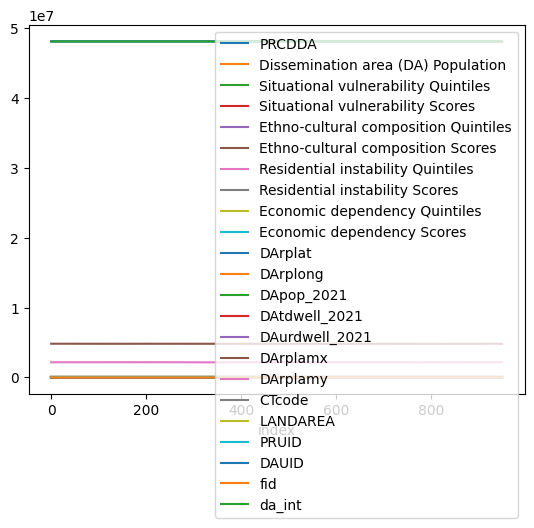

In [91]:
comb_df2.plot()

In [93]:
comb_df2['name'].value_counts()

name
Strathcona                 26
Alberta Avenue             24
Downtown                   20
Oliver                     20
Kilkenny                   19
                           ..
Evergreen                   1
Mill Creek Ravine South     1
Idylwylde                   1
Sherbrooke                  1
Laurier Heights             1
Name: count, Length: 218, dtype: int64

In [100]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   neighbourhood_number_x             403 non-null    object        
 1   name                               403 non-null    object        
 2   effective_end_date                 0 non-null      object        
 3   descriptive_name                   403 non-null    object        
 4   description                        337 non-null    object        
 5   civic_ward_name                    403 non-null    object        
 6   effective_start_date               403 non-null    datetime64[ns]
 7   district                           403 non-null    object        
 8   neighbourhood_name                 277 non-null    object        
 9   neighbourhood_number_y             277 non-null    float64       
 10  Education_Training_Profile    

In [96]:
pca = pd.read_csv(r"C:\Users\toast\Downloads\PCA_Neighborhood_Vulnerability_Index_Data_with_Names.csv")

In [108]:
pd.set_option('display.max_columns',None)
comb_df2.head()

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,Economic dependency Quintiles,Economic dependency Scores,DArplat,DArplong,DApop_2021,DAtdwell_2021,DAurdwell_2021,DArplamx,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type,fid,da_int,name,geometry
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2021S051248110083,48110083,Alberta,717,5,1.656,5,2.738,5,1.395,1,-0.675,53.567444,-113.383838,638.0,348.0,313.0,4.822695e+06,2.168269e+06,3776,MULTIPOLYGON (((-113.388777518234 53.570538794...,Edmonton,0.2533,48,48110083.0,INTERSECTS,Census Dissemination Area,1.0,48111966.0,ANTHONY HENDAY BIG LAKE,MULTIPOLYGON (((-113.63916962676993 53.5997125...
1,2021S051248110085,48110085,Alberta,574,5,0.889,5,2.182,5,1.475,1,-1.347,53.574096,-113.391049,525.0,252.0,220.0,4.822494e+06,2.169113e+06,2197,MULTIPOLYGON (((-113.38734679662497 53.5708821...,Edmonton,0.1830,48,48110085.0,INTERSECTS,Census Dissemination Area,2.0,48111958.0,ANTHONY HENDAY RAMPART,MULTIPOLYGON (((-113.6014920915938 53.62064122...
2,2021S051248110086,48110086,Alberta,370,3,-0.230,3,-0.100,4,0.101,4,0.245,53.573283,-113.396140,385.0,163.0,152.0,4.822151e+06,2.169139e+06,2197,MULTIPOLYGON (((-113.39364159883434 53.5713495...,Edmonton,0.1630,48,48110086.0,INTERSECTS,Census Dissemination Area,3.0,48111970.0,WINTERBURN INDUSTRIAL AREA WEST,MULTIPOLYGON (((-113.68891105110117 53.5205227...
3,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,3,-0.072,53.576344,-113.397003,238.0,109.0,101.0,4.822209e+06,2.169474e+06,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area,4.0,48111972.0,POTTER GREENS,MULTIPOLYGON (((-113.68039614385972 53.5175627...
4,2021S051248110088,48110088,Alberta,322,4,-0.061,1,-0.811,4,0.482,2,-0.416,53.574933,-113.401712,334.0,147.0,135.0,4.821868e+06,2.169431e+06,2197,MULTIPOLYGON (((-113.39837051581337 53.5751028...,Edmonton,0.1256,48,48110088.0,INTERSECTS,Census Dissemination Area,5.0,48111974.0,ANTHONY HENDAY SOUTH WEST,MULTIPOLYGON (((-113.64842633129088 53.5025496...


In [107]:
comb_df2['name'] = comb_df2['name'].str.upper()

In [98]:
pca.head()

,neighbourhood_name,neighbourhood_number,Education_Training_Profile,Demographic_Housing_Profile,Employment_Work_Pattern_Profile,Family_Dwelling_Characteristics,Income_Inequality_Family_Dynamics,Work_Life_Balance_Income_Equality,PC7_Mixed_Factors,PC8_Mixed_Factors,PC9_Mixed_Factors,PC10_Mixed_Factors,PC11_Mixed_Factors,PC12_Mixed_Factors,PCA_Sum
0,ABBOTTSFIELD,2010,-7.18,-2.962884,4.546034,1.201819,-3.368228,-0.533239,-0.043504,1.048666,-0.911090,-1.217446,1.336650,1.555954,-16.216034
1,ALBANY,3460,-6.19,-4.668445,-1.420219,1.911653,-1.443614,0.553169,0.769335,0.301044,-0.009346,0.668393,0.232428,-0.323352,-14.055561
2,ALBERTA AVENUE,1010,10.23,2.011574,4.367455,0.343993,0.964988,-2.087472,-1.466836,-0.565888,1.537319,0.236816,-0.994883,-0.027380,5.432444
3,ALDERGROVE,4020,5.83,-0.977835,2.774397,-0.757781,-0.233541,0.258576,-0.093012,-0.754690,0.054957,1.107462,0.244267,-0.419633,2.652780
4,ALLARD,5458,17.92,-3.849065,-2.139112,0.190472,0.371591,1.430875,-1.769827,-0.432546,-1.212166,0.586744,0.170754,-1.360859,7.154751


In [109]:
comb_join = pd.merge(left=comb_df2, right=pca, left_on='name', right_on='neighbourhood_name', how='inner')

In [110]:
pd.set_option('display.max_columns',None)
comb_join.head()

,DAdguid,PRCDDA,Province,Dissemination area (DA) Population,Situational vulnerability Quintiles,Situational vulnerability Scores,Ethno-cultural composition Quintiles,Ethno-cultural composition Scores,Residential instability Quintiles,Residential instability Scores,Economic dependency Quintiles,Economic dependency Scores,DArplat,DArplong,DApop_2021,DAtdwell_2021,DAurdwell_2021,DArplamx,DArplamy,CTcode,the_geom,CCSNAME,LANDAREA,PRUID,DAUID,_predicate,Boundary Type,fid,da_int,name,geometry,neighbourhood_name,neighbourhood_number,Education_Training_Profile,Demographic_Housing_Profile,Employment_Work_Pattern_Profile,Family_Dwelling_Characteristics,Income_Inequality_Family_Dynamics,Work_Life_Balance_Income_Equality,PC7_Mixed_Factors,PC8_Mixed_Factors,PC9_Mixed_Factors,PC10_Mixed_Factors,PC11_Mixed_Factors,PC12_Mixed_Factors,PCA_Sum
0,2021S051248110087,48110087,Alberta,203,1,-0.624,1,-0.877,4,0.285,3,-0.072,53.576344,-113.397003,238.0,109.0,101.0,4.822209e+06,2.169474e+06,2197,MULTIPOLYGON (((-113.39533839479972 53.5775823...,Edmonton,0.0924,48,48110087.0,INTERSECTS,Census Dissemination Area,4.0,48111972.0,POTTER GREENS,MULTIPOLYGON (((-113.68039614385972 53.5175627...,POTTER GREENS,4710,-8.490000,3.628275,-1.121584,-2.808518,2.036383,1.566790,1.257176,-2.221725,-0.165747,1.820683,-1.503865,-0.106091,-16.414944
1,2021S051248110089,48110089,Alberta,613,5,0.506,5,0.916,1,-1.006,2,-0.329,53.577848,-113.404145,483.0,179.0,164.0,4.821824e+06,2.169785e+06,2197,MULTIPOLYGON (((-113.40364523611676 53.5785918...,Edmonton,0.1325,48,48110089.0,INTERSECTS,Census Dissemination Area,6.0,48111975.0,ORMSBY PLACE,MULTIPOLYGON (((-113.64013380615215 53.4967628...,ORMSBY PLACE,4380,4.459051,-0.311967,2.109994,-0.856907,-0.400183,-0.218605,-0.874593,-0.388164,-0.229828,0.069979,-0.214563,0.489352,-3.424831
2,2021S051248110091,48110091,Alberta,399,4,-0.059,4,-0.009,3,-0.126,5,0.544,53.577456,-113.410657,413.0,180.0,172.0,4.821410e+06,2.169885e+06,2197,MULTIPOLYGON (((-113.4072766903225 53.58003979...,Edmonton,0.1951,48,48110091.0,INTERSECTS,Census Dissemination Area,8.0,48111977.0,ORMSBY PLACE,MULTIPOLYGON (((-113.64013380615215 53.4967628...,ORMSBY PLACE,4380,4.459051,-0.311967,2.109994,-0.856907,-0.400183,-0.218605,-0.874593,-0.388164,-0.229828,0.069979,-0.214563,0.489352,-3.424831
3,2021S051248110090,48110090,Alberta,450,5,0.397,3,-0.301,2,-0.402,3,-0.064,53.573968,-113.406550,413.0,190.0,185.0,4.821535e+06,2.169436e+06,2197,MULTIPOLYGON (((-113.4029791131353 53.57352690...,Edmonton,0.1822,48,48110090.0,INTERSECTS,Census Dissemination Area,7.0,48111976.0,LYMBURN,MULTIPOLYGON (((-113.6397665283806 53.50225575...,LYMBURN,4270,8.337210,0.055323,0.838378,-0.218021,1.479053,-1.391645,-0.775406,-0.965129,0.109948,0.478277,0.021554,0.107433,-3.273325
4,2021S051248110092,48110092,Alberta,321,5,0.973,4,0.174,5,0.592,3,-0.077,53.572411,-113.410391,371.0,167.0,154.0,4.821242e+06,2.169358e+06,2197,MULTIPOLYGON (((-113.40759940203274 53.5718964...,Edmonton,0.1255,48,48110092.0,INTERSECTS,Census Dissemination Area,9.0,48111978.0,LYMBURN,MULTIPOLYGON (((-113.63451592755034 53.4968689...,LYMBURN,4270,8.337210,0.055323,0.838378,-0.218021,1.479053,-1.391645,-0.775406,-0.965129,0.109948,0.478277,0.021554,0.107433,-3.273325


In [111]:
comb_join.shape

(796, 46)

<Axes: >

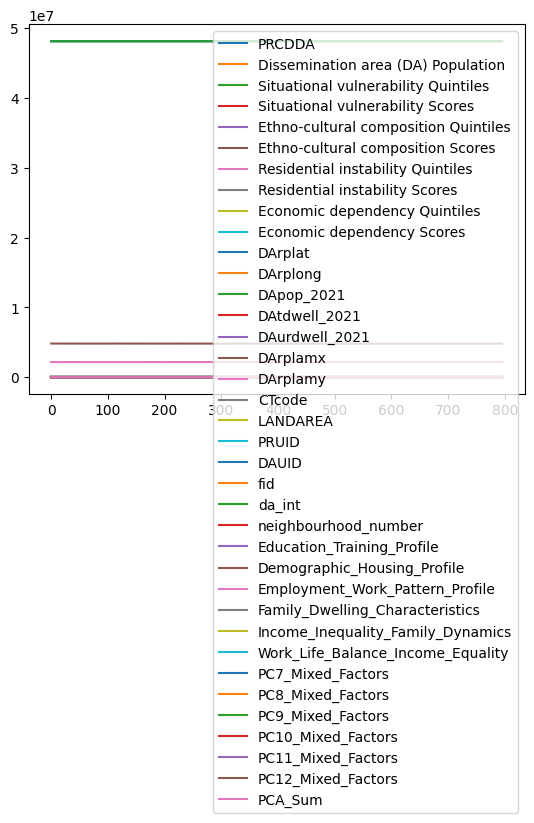

In [112]:
comb_join.plot()

In [119]:
comb_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   DAdguid                               796 non-null    object  
 1   PRCDDA                                796 non-null    int64   
 2   Province                              796 non-null    object  
 3   Dissemination area (DA) Population    796 non-null    int64   
 4   Situational vulnerability Quintiles   796 non-null    int64   
 5   Situational vulnerability Scores      796 non-null    float64 
 6   Ethno-cultural composition Quintiles  796 non-null    int64   
 7   Ethno-cultural composition Scores     796 non-null    float64 
 8   Residential instability Quintiles     796 non-null    int64   
 9   Residential instability Scores        796 non-null    float64 
 10  Economic dependency Quintiles         796 non-null    int64   
 11

In [124]:
gs = xr.DataArray(comb_geo['the_geom'])

In [128]:
comb_geo['geo2'] = gpd.GeoSeries(comb_geo['the_geom'].apply(wkt.loads))

In [114]:
comb_geo = gpd.GeoDataFrame(comb_join)

In [117]:
comb_geo.to_file('comb_geo', driver= 'GeoJSON')

In [129]:
comb_geo['matches'] = comb_geo.apply(lambda row: row['geo2'].intersects(row['geometry']), axis=1)

# The 'matches' column will contain True if there is an intersection, False otherwise.


In [133]:
comb_geo['neighbourhood_name'].value_counts()

neighbourhood_name
STRATHCONA         26
ALBERTA AVENUE     24
OLIVER             20
DOWNTOWN           20
KILKENNY           19
                   ..
OLESKIW             1
CARTER CREST        1
BRANDER GARDENS     1
PARKALLEN           1
LAURIER HEIGHTS     1
Name: count, Length: 172, dtype: int64